In [417]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
# Path dari google drive
file_path = ('gender-titanic2.csv')

# membaca dataset csv menjadi dataframe
df = pd.read_csv(file_path)

# menampilkan lima baris pertama dari dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [419]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [420]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [421]:
# Check for missing values
missing_values = df.isnull().sum()
print(f'Missing values:\n{missing_values}')

# Fill missing Age with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop rows where Fare is missing (if any)
df.dropna(subset=['Fare'], inplace=True)

# Check for missing values after cleaning
missing_values_after_cleaning = df.isnull().sum()
print(f'Missing values after cleaning:\n{missing_values_after_cleaning}')


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_5684\1260460000.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_5684\1260460000.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [422]:
# Perform OneHotEncoding on 'Sex' and 'Embarked' columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the new dataframe
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500   NaN      True       False        True  
1          PC 17599  71.2833   C85     False       False       False  
2  STON/O2. 3101282   7.9250   NaN     False       False        True  
3            113803  53.1000  C123     Fal

**BAR CHART**

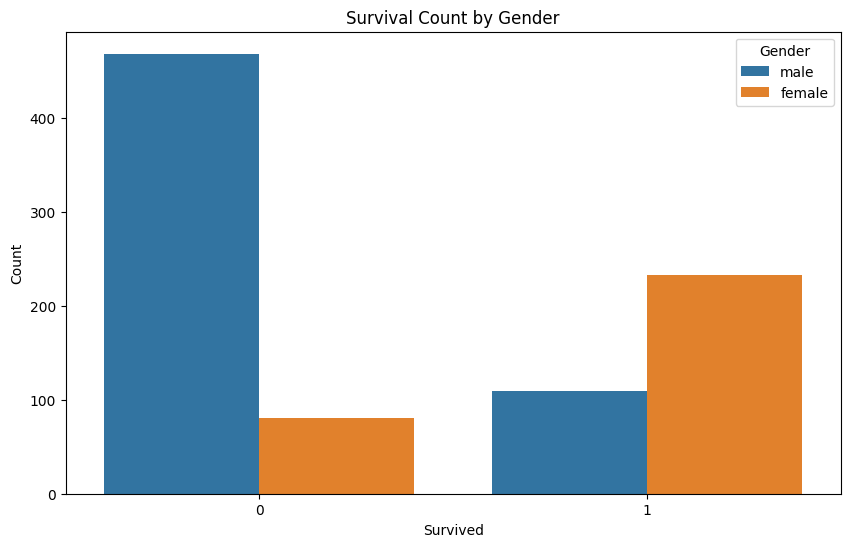

In [423]:
# Plotting the survival rate based on gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

 **Line Chart**

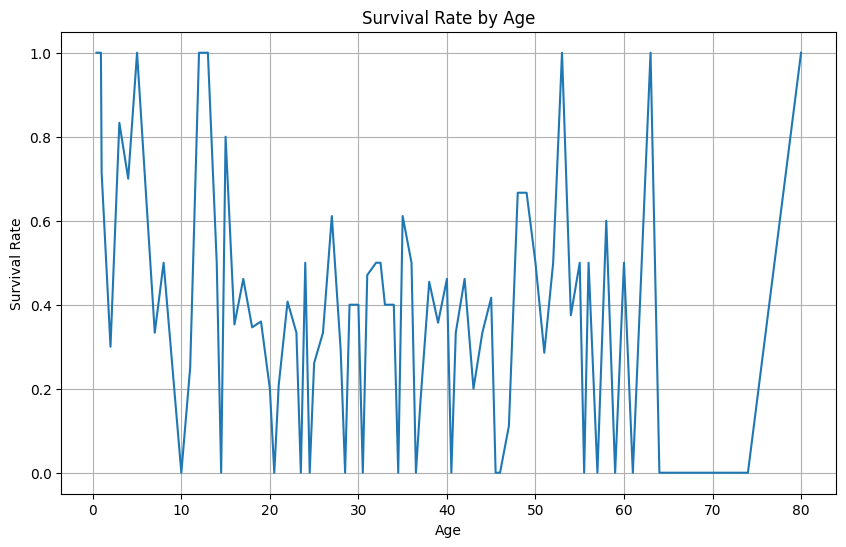

In [424]:
# Calculate survival rate by age
survival_rate_by_age = df.groupby('Age')['Survived'].mean()

# Plotting the survival rate by age
plt.figure(figsize=(10, 6))
survival_rate_by_age.plot(kind='line')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()


**Scatter Plot**

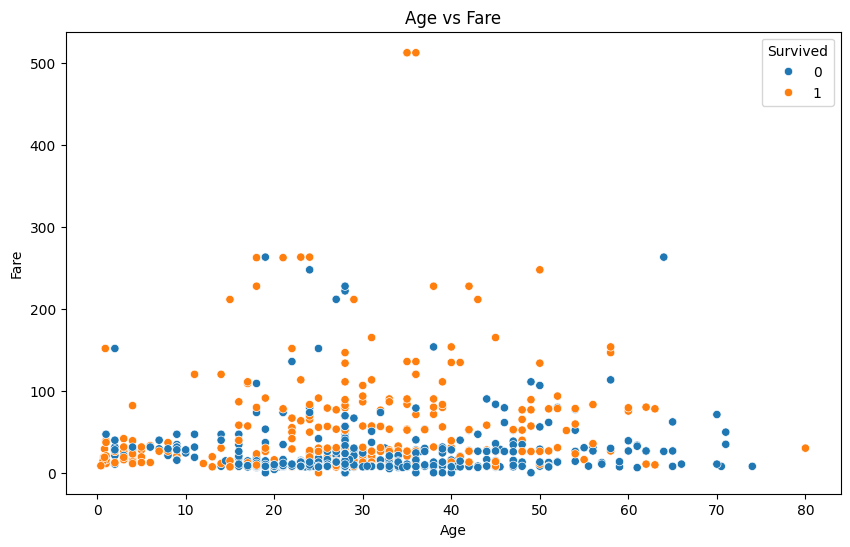

In [425]:
# Plotting the scatter plot of Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()


**Heatmap**

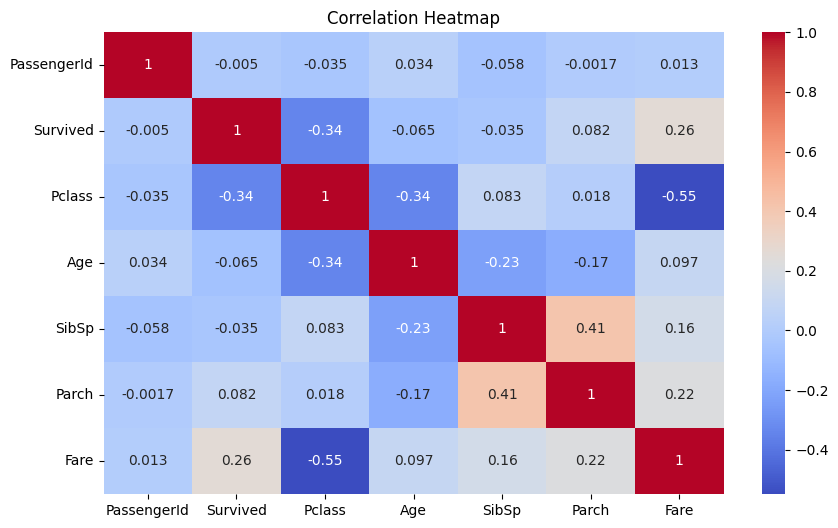

In [426]:
# Select only numeric columns for the correlation heatmap
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Line Chart**

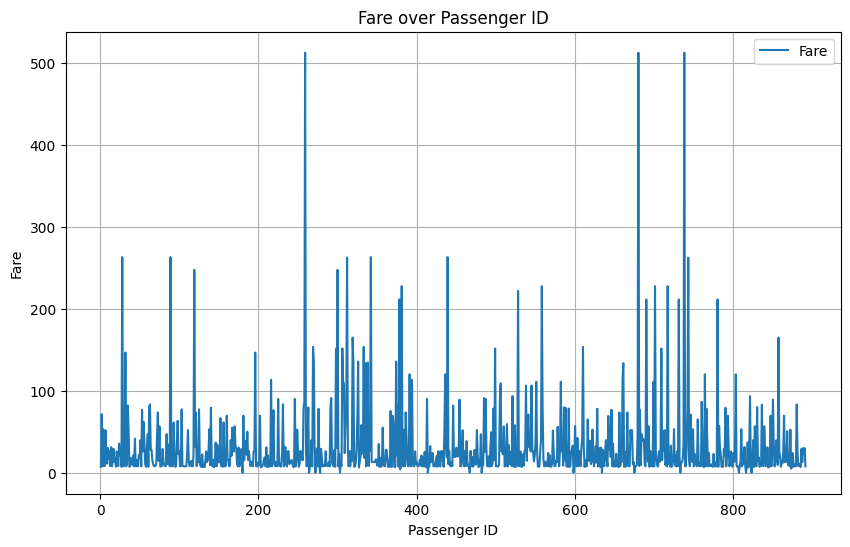

In [427]:
# Plotting the fare over passenger ID
plt.figure(figsize=(10, 6))
plt.plot(df['PassengerId'], df['Fare'], label='Fare')
plt.title('Fare over Passenger ID')
plt.xlabel('Passenger ID')
plt.ylabel('Fare')
plt.legend()
plt.grid(True)
plt.show()

**Scatter Plot**

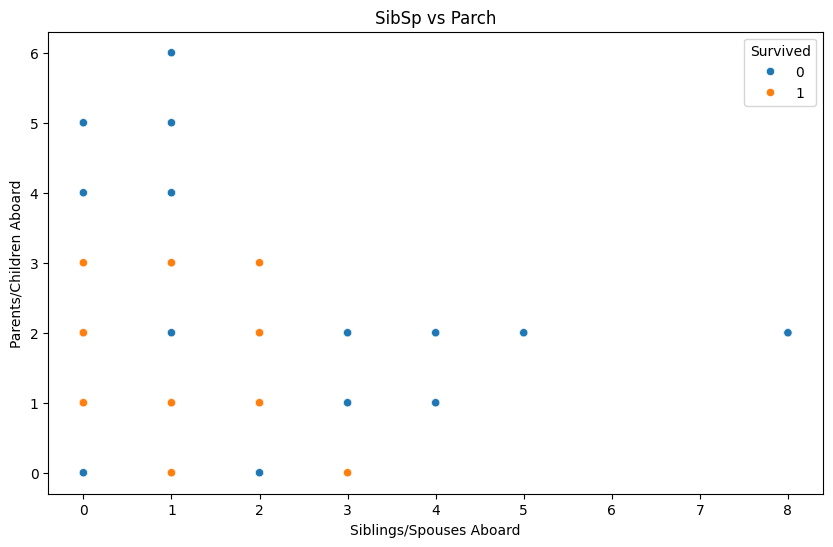

In [428]:
# Plotting the scatter plot of SibSp vs Parch
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SibSp', y='Parch', hue='Survived')
plt.title('SibSp vs Parch')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Parents/Children Aboard')
plt.legend(title='Survived')
plt.show()

**Pie Chart**

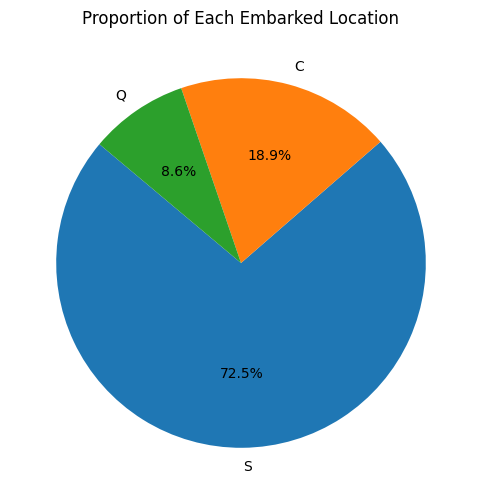

In [429]:
# Plotting the proportion of each embarked location
embarked_counts = df['Embarked'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Embarked Location')
plt.show()

**Line Graph**

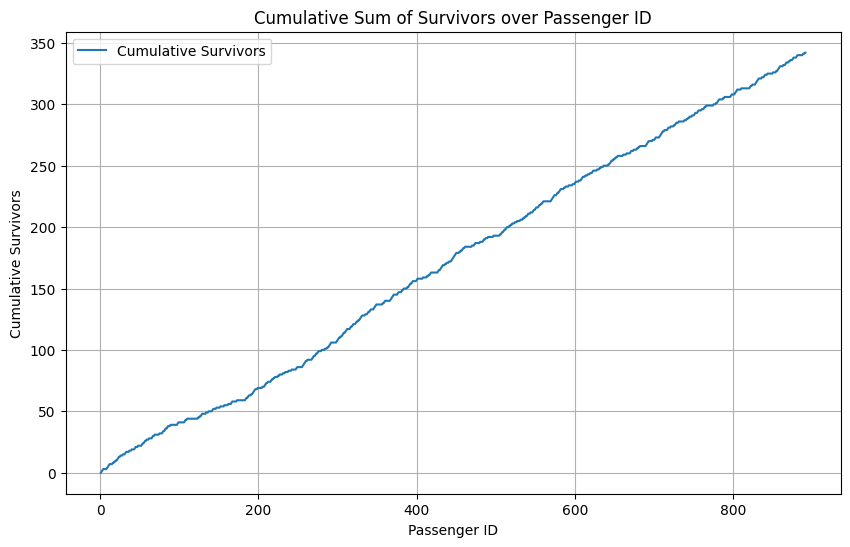

In [430]:
# Plotting the cumulative sum of survivors over passenger ID
cumsum_survivors = df['Survived'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df['PassengerId'], cumsum_survivors, label='Cumulative Survivors')
plt.title('Cumulative Sum of Survivors over Passenger ID')
plt.xlabel('Passenger ID')
plt.ylabel('Cumulative Survivors')
plt.legend()
plt.grid(True)
plt.show()

**Histogram**

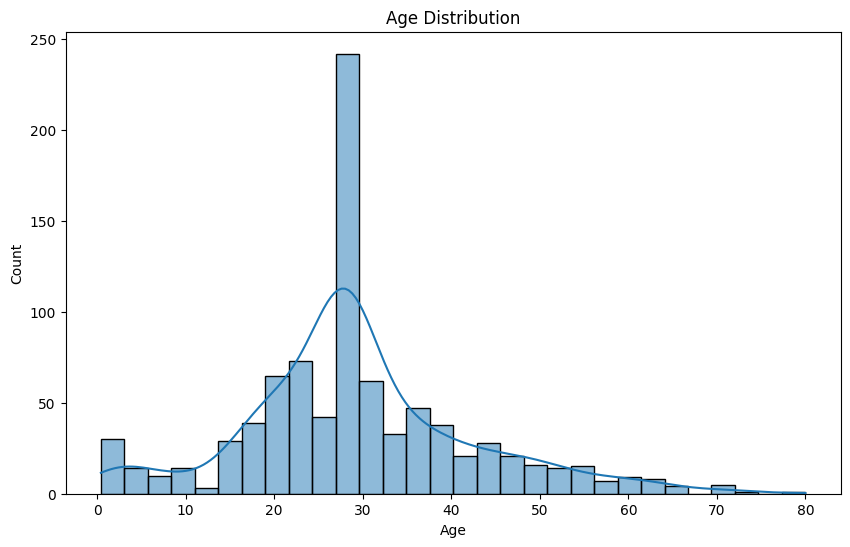

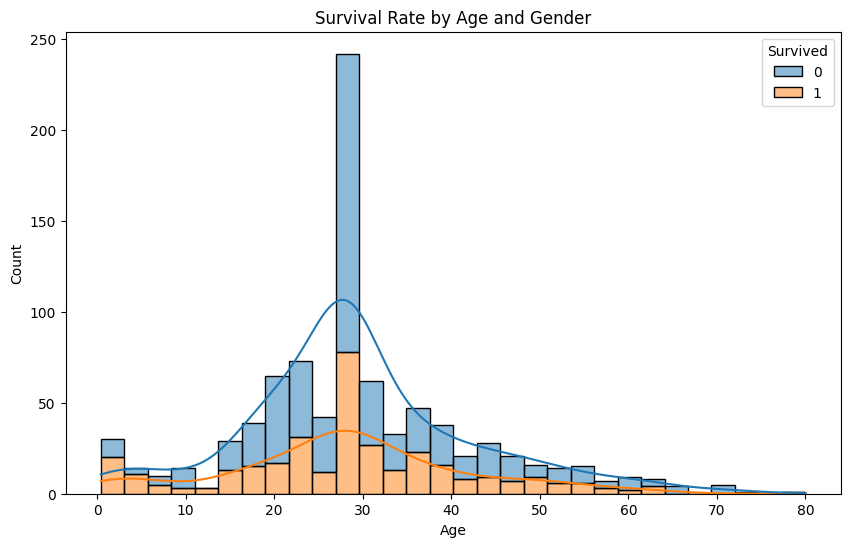

In [431]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival rate by age and gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Survival Rate by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [432]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [433]:
# Mengubah nama kolom 'Ticket' menjadi 'Ticket_Number' dan 'Cabin' menjadi 'Cabin_Number'
df.rename(columns={'Ticket': 'Ticket_Number', 'Cabin': 'Cabin_Number'}, inplace=True)

# Memeriksa hasil perubahan nama kolom
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket_Number,Fare,Cabin_Number,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [434]:
# Mengubah semua nilai dalam kolom 'Cabin_Number' menjadi "habis"
df['Cabin_Number'] = 'habis'

# Memeriksa hasil perubahan nilai
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket_Number,Fare,Cabin_Number,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,habis,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,habis,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,habis,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,habis,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,habis,S


In [435]:

df.drop(columns=['Pclass'], inplace=True)

df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket_Number,Fare,Cabin_Number,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,habis,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,habis,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,habis,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,habis,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,habis,S


In [436]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and 'Pclass' is no longer present

# Select relevant features and target variable, removing 'Pclass'
#features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']  # Removed 'Pclass'
#X = df[features]
#y = df['Survived']

# Preprocessing for numerical data
#numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
#numerical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())
#])

# Preprocessing for categorical data
#categorical_features = ['Sex', 'Embarked']  # Removed 'Pclass'
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Combine preprocessing steps
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numerical_transformer, numerical_features),
#        ('cat', categorical_transformer, categorical_features)
 #   ])

# Apply preprocessing to the data
#X = preprocessor.fit_transform(X)

In [437]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [438]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and 'Pclass' is no longer present

# Select relevant features and target variable, removing 'Pclass'
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']


In [439]:
X

,Sex,Age,SibSp,Parch,Fare,Embarked
0,male,22.0,1,0,7.2500,S
1,female,38.0,1,0,71.2833,C
2,female,26.0,0,0,7.9250,S
3,female,35.0,1,0,53.1000,S
4,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S
887,female,19.0,0,0,30.0000,S
888,female,28.0,1,2,23.4500,S
889,male,26.0,0,0,30.0000,C


In [440]:
# Preprocessing for numerical data
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [454]:
import pickle

# Assuming 'preprocessor' is your fitted preprocessor object
# Serialize the fitted preprocessor to a file
with open('fitted_preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [441]:

# Assuming 'X' is your original DataFrame before preprocessing

# Get feature names for numerical features directly
numerical_feature_names = numerical_features

# Get new feature names for categorical features from the transformer
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = numerical_feature_names + list(categorical_feature_names)

# Convert the preprocessed data back to a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Display the DataFrame
print(X_preprocessed_df.head())

        Age     SibSp     Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0 -0.565736  0.432793 -0.473674 -0.502445         0.0       1.0         0.0   
1  0.663861  0.432793 -0.473674  0.786845         1.0       0.0         1.0   
2 -0.258337 -0.474545 -0.473674 -0.488854         1.0       0.0         0.0   
3  0.433312  0.432793 -0.473674  0.420730         1.0       0.0         0.0   
4  0.433312 -0.474545 -0.473674 -0.486337         0.0       1.0         0.0   

   Embarked_Q  Embarked_S  
0         0.0         1.0  
1         0.0         0.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  


In [442]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [443]:
X

,Sex,Age,SibSp,Parch,Fare,Embarked
0,male,22.0,1,0,7.2500,S
1,female,38.0,1,0,71.2833,C
2,female,26.0,0,0,7.9250,S
3,female,35.0,1,0,53.1000,S
4,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S
887,female,19.0,0,0,30.0000,S
888,female,28.0,1,2,23.4500,S
889,male,26.0,0,0,30.0000,C


**KNN**

In [444]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate and print KNN metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)

print('KNN Accuracy: {:.2f}'.format(knn_accuracy))
print('KNN Precision: {:.2f}'.format(knn_precision))
print('KNN Recall: {:.2f}'.format(knn_recall))
print('KNN F1-score: {:.2f}'.format(knn_f1))
print('KNN Confusion Matrix:\n{}\n'.format(knn_cm))

KNN Accuracy: 0.79
KNN Precision: 0.76
KNN Recall: 0.70
KNN F1-score: 0.73
KNN Confusion Matrix:
[[89 16]
 [22 52]]



KNN Accuracy: 0.79
KNN Precision: 0.76
KNN Recall: 0.70
KNN F1-score: 0.73


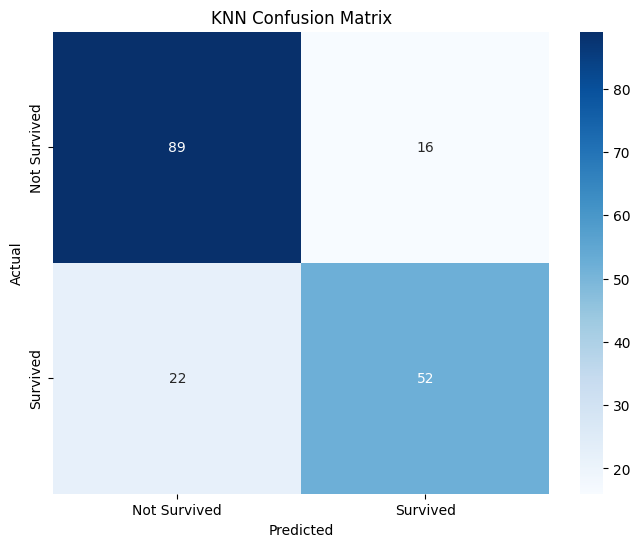

In [445]:
# Initialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate accuracy, precision, recall, F1-score, and confusion matrix
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)

# Print metrics
print('KNN Accuracy: {:.2f}'.format(knn_accuracy))
print('KNN Precision: {:.2f}'.format(knn_precision))
print('KNN Recall: {:.2f}'.format(knn_recall))
print('KNN F1-score: {:.2f}'.format(knn_f1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Support Vector Machine (SVM)**

In [446]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Calculate and print SVM metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

print('SVM Accuracy: {:.2f}'.format(svm_accuracy))
print('SVM Precision: {:.2f}'.format(svm_precision))
print('SVM Recall: {:.2f}'.format(svm_recall))
print('SVM F1-score: {:.2f}'.format(svm_f1))
print('SVM Confusion Matrix:\n{}\n'.format(svm_cm))


SVM Accuracy: 0.81
SVM Precision: 0.79
SVM Recall: 0.73
SVM F1-score: 0.76
SVM Confusion Matrix:
[[91 14]
 [20 54]]



SVM Accuracy: 0.81
SVM Precision: 0.79
SVM Recall: 0.73
SVM F1-score: 0.76


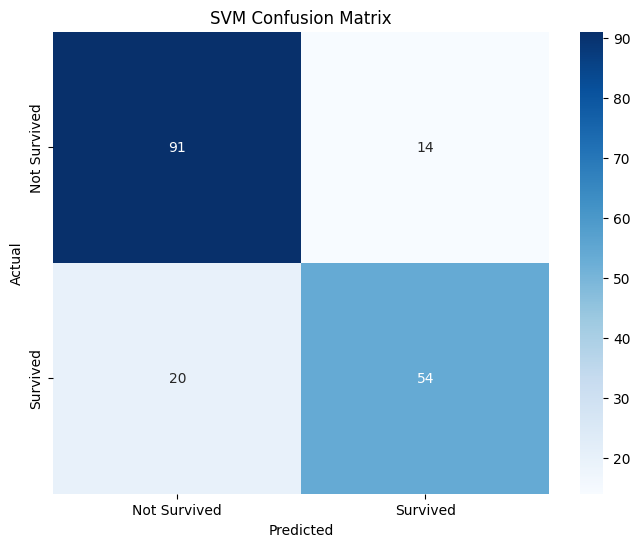

In [447]:
# Initialize and train SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Calculate accuracy, precision, recall, F1-score, and confusion matrix
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)

# Print metrics
print('SVM Accuracy: {:.2f}'.format(svm_accuracy))
print('SVM Precision: {:.2f}'.format(svm_precision))
print('SVM Recall: {:.2f}'.format(svm_recall))
print('SVM F1-score: {:.2f}'.format(svm_f1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Decision Tree**

In [448]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Calculate and print Decision Tree metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_cm = confusion_matrix(y_test, y_pred_dt)

print('Decision Tree Accuracy: {:.2f}'.format(dt_accuracy))
print('Decision Tree Precision: {:.2f}'.format(dt_precision))
print('Decision Tree Recall: {:.2f}'.format(dt_recall))
print('Decision Tree F1-score: {:.2f}'.format(dt_f1))
print('Decision Tree Confusion Matrix:\n{}\n'.format(dt_cm))


Decision Tree Accuracy: 0.76
Decision Tree Precision: 0.70
Decision Tree Recall: 0.73
Decision Tree F1-score: 0.72
Decision Tree Confusion Matrix:
[[82 23]
 [20 54]]



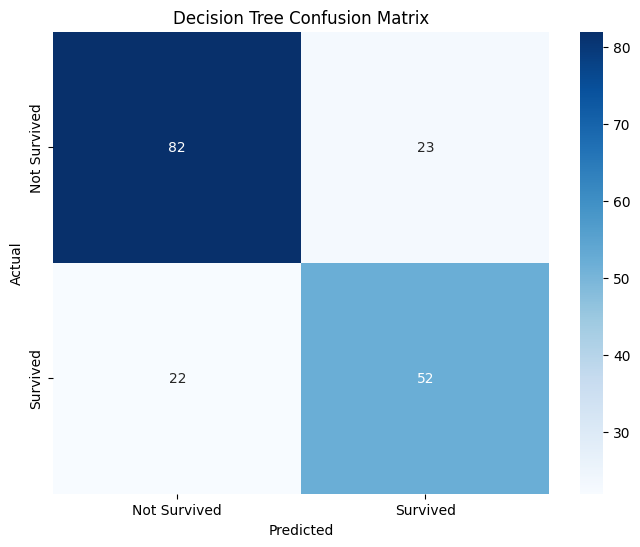

In [449]:
# Initialize and train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Calculate confusion matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**


In [450]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate and print Random Forest metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

print('Random Forest Accuracy: {:.2f}'.format(rf_accuracy))
print('Random Forest Precision: {:.2f}'.format(rf_precision))
print('Random Forest Recall: {:.2f}'.format(rf_recall))
print('Random Forest F1-score: {:.2f}'.format(rf_f1))
print('Random Forest Confusion Matrix:\n{}\n'.format(rf_cm))

Random Forest Accuracy: 0.81
Random Forest Precision: 0.77
Random Forest Recall: 0.77
Random Forest F1-score: 0.77
Random Forest Confusion Matrix:
[[88 17]
 [17 57]]



Random Forest Accuracy: 0.80
Random Forest Precision: 0.77
Random Forest Recall: 0.76
Random Forest F1-score: 0.76


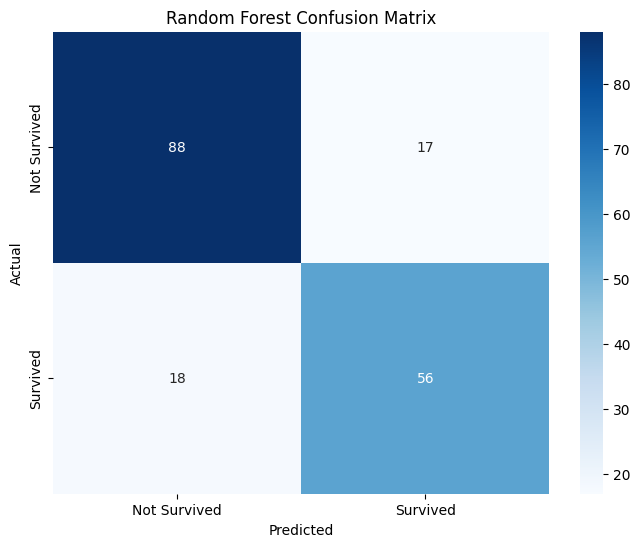

In [451]:

# Initialize and train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate accuracy, precision, recall, F1-score, and confusion matrix
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Print metrics
print('Random Forest Accuracy: {:.2f}'.format(rf_accuracy))
print('Random Forest Precision: {:.2f}'.format(rf_precision))
print('Random Forest Recall: {:.2f}'.format(rf_recall))
print('Random Forest F1-score: {:.2f}'.format(rf_f1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [452]:
import pickle
with open ('rf_model.pkl', 'wb') as file:
  pickle.dump(rf, file)

In [453]:
X_train, y_train

(array([[ 1.24023486, -0.4745452 , -0.47367361, ...,  0.        ,
          0.        ,  1.        ],
        [-0.48888662, -0.4745452 , -0.47367361, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.89441056,  1.34013193, -0.47367361, ...,  0.        ,
          0.        ,  1.        ],
        [-1.18053521,  0.43279337,  2.00893337, ...,  0.        ,
          0.        ,  1.        ],
        [-0.6425863 , -0.4745452 ,  0.76762988, ...,  0.        ,
          0.        ,  1.        ]]),
 331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64)